In [27]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [28]:
ct= pd.read_csv('Customers_cleaned.csv')
er= pd.read_csv('Exchange_Rates_cleaned.csv')
pt= pd.read_csv('Products_cleaned.csv')
sales= pd.read_csv('Sales_cleaned.csv')
stores= pd.read_csv('Stores_cleaned.csv')

In [3]:
#Visualization based on Customers data

In [29]:
ct.head(10)

,CustomerKey,Gender,Name,City,StateCode,State,ZipCode,Country,Continent,Birthday
0,301,Female,Lilly Harding,wandearah east,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,mount budd,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,winjallok,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,middle river,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,tawonga south,VIC,Victoria,3698,Australia,Australia,1965-11-19
5,1086,Male,Hayden Clegg,templers,SA,South Australia,5371,Australia,Australia,1954-01-20
6,1133,Male,Nicholas Caffyn,jubilee pocket,QLD,Queensland,4802,Australia,Australia,1969-11-22
7,1256,Male,Lincoln Jenks,kullogum,QLD,Queensland,4660,Australia,Australia,1950-03-12
8,1314,Male,Isaac Israel,edith river,NT,Northern Territory,852,Australia,Australia,1965-12-21
9,1568,Male,Luke Virtue,kotta,VIC,Victoria,3565,Australia,Australia,1975-07-25


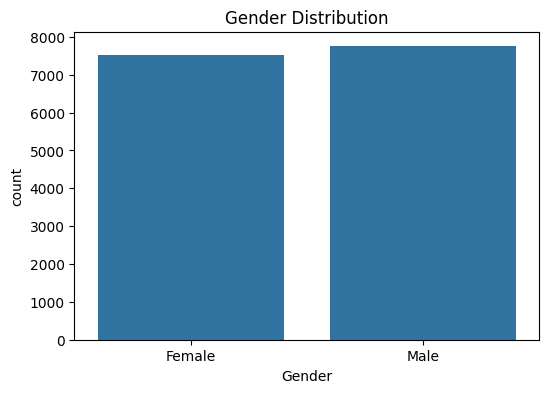

In [5]:
# Based on Gender Distribution
gender_distribution = ct['Gender'].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=ct)
plt.title('Gender Distribution')
plt.show()


In [6]:
#Calculating 'Age' for better analysing
ct['Age']=((pd.Timestamp.now()-pd.to_datetime(ct['Birthday'])).dt.days/365.25).astype(int)

In [7]:
# Bar chart of age distribution
fig= px.histogram(ct, x='Age', title='Age Distribution', color=ct['Age'])
fig.update_layout(bargap=0.3)
fig.show()


In [8]:

# Creating a bar plot for Top 10 State based on customers
top_states = ct['State'].value_counts().head(10)
fig = px.bar(

    x = top_states.index,
    y = top_states.values,
    title= "Top 10 State based on Customers ",
    labels= {'x': "State", 'y': 'Customers Count'},
    color = top_states
    )
fig.update_layout(font=dict(size=9))
fig.show()

In [9]:
# Finding  the cities with the most customers
top_cities = ct['City'].value_counts().head(10)

sns.set_style="whitegrid"
fig_city= px.bar(

    x = top_cities.index,
    y = top_cities.values,
    title= "Top 10 City based on Customers ",
    labels= {'x': "City", 'y': 'Customers Count'},
    color= top_cities
    )
fig_city.update_layout(font=dict(size=9))
fig_city.show()

In [10]:
# Create a bar plot for country distribution
country_counts= ct['Country'].value_counts()
p1 = go.Pie(values= country_counts.values , labels= country_counts.index)
fig = go.Figure(p1)

fig.show()

In [11]:
#Visualization based on sales data

In [12]:
sales.head(10)

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1269051,0,2007,1,USD
3,366002,1,2016-01-01,266019,0,1106,7,CAD
4,366002,2,2016-01-01,266019,0,373,1,CAD
5,366002,3,2016-01-01,266019,0,1080,4,CAD
6,366004,1,2016-01-01,1107461,38,163,6,GBP
7,366004,2,2016-01-01,1107461,38,1529,2,GBP
8,366005,1,2016-01-01,844003,33,421,4,EUR
9,366007,1,2016-01-01,2035771,43,1617,1,USD


In [30]:
#Orders based on Currency
Currency= sales['CurrencyCode'].value_counts()
fig= px.bar(x=Currency.index, y=Currency.values,
            title="Orders based on Currency",
            color= Currency,
            labels= {'x': "Currency", 'y': 'Orders Count'})
fig.show()

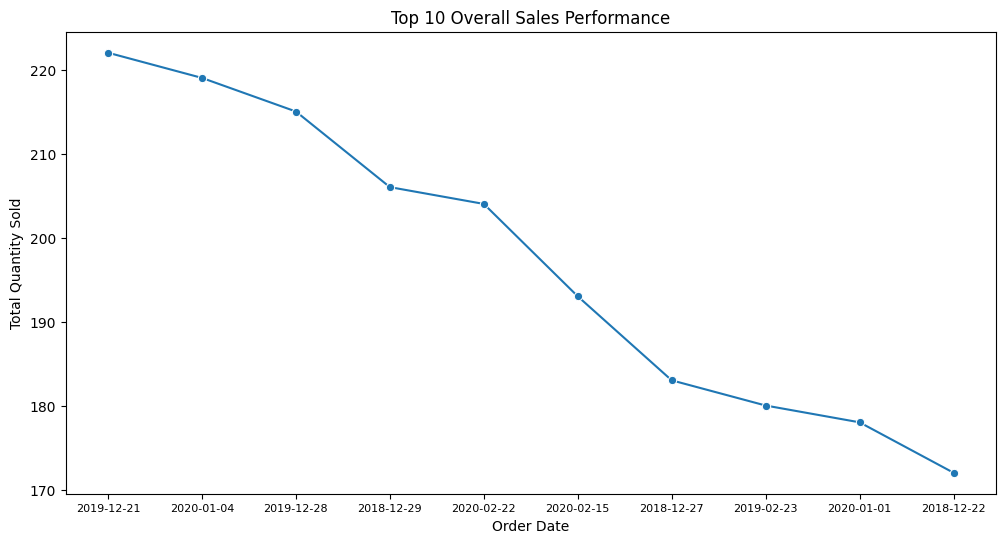

In [31]:
#Top 10 Sales based on Order date

sales_by_top10 = sales['OrderDate'].value_counts().head(10)

# Creating a barplot
plt.figure(figsize=(12, 6))
plt.xticks(fontsize=8)
sns.lineplot(x=sales_by_top10.index, y=sales_by_top10.values, marker="o")
plt.xlabel('Order Date')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Overall Sales Performance')

plt.show()


In [32]:
#Visualization based on Products
pt.head(10)

,ProductKey,ProductName,Brand,Color,UnitCostUSD,UnitPriceUSD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
5,6,Contoso 2G MP3 Player E200 Black,Contoso,Black,11.00,21.57,101,MP4&MP3,1,Audio
6,7,Contoso 2G MP3 Player E200 Blue,Contoso,Blue,11.00,21.57,101,MP4&MP3,1,Audio
7,8,Contoso 4G MP3 Player E400 Silver,Contoso,Silver,30.58,59.99,101,MP4&MP3,1,Audio
8,9,Contoso 4G MP3 Player E400 Black,Contoso,Black,30.58,59.99,101,MP4&MP3,1,Audio
9,10,Contoso 4G MP3 Player E400 Green,Contoso,Green,30.58,59.99,101,MP4&MP3,1,Audio


In [33]:
# Grouping by category to find the maximum unit cost

category_max_cost = pt.groupby('Category')['UnitCostUSD'].max().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
fig= px.bar(x=category_max_cost.index, y=category_max_cost.values,
            title="Maximum Unit Cost by Category",
            color= category_max_cost,
            labels= {'x': "Category", 'y': 'Maximum Unit Cost'})
fig.update_layout(font=dict(size=8))
fig.show()


<Figure size 1000x600 with 0 Axes>

In [34]:
# Grouping by Brand and calculating the average of Unit Cost and Unit Price

brand_average = pt.groupby('Brand').agg({'UnitCostUSD': 'mean', 'UnitPriceUSD': 'mean'}).reset_index()

fig = px.bar(brand_average, x='Brand', y=['UnitCostUSD', 'UnitPriceUSD'], barmode='group')

fig.update_layout(title='Average Unit Cost and Unit Price by Brand', xaxis_title='Brand', yaxis_title='Average Value')


fig.show()


In [18]:
#Top brands from products

top_brands= pt['Brand'].value_counts().head(10)
fig= px.bar(x=top_brands.index,y=top_brands.values,
            title="Top Brands from Products",
            labels={'x':"Brand", 'y':"Count"},
            color=top_brands)
fig.update_layout(font=dict(size=8))

fig.show()


In [35]:
stores.head(10)

,StoreKey,Country,State,SquareMeters,OpenDate
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
5,6,Australia,Western Australia,2000.0,2010-01-01
6,7,Canada,New Brunswick,1105.0,2007-05-07
7,8,Canada,Newfoundland and Labrador,2105.0,2014-07-02
8,9,Canada,Northwest Territories,1500.0,2005-03-04
9,10,Canada,Nunavut,1210.0,2015-04-04


In [36]:
#Stores By Country

stores_by_country = stores.groupby('Country')['SquareMeters'].sum()

fig= px.bar(x=stores_by_country.index, y=stores_by_country.values,
            title="Stores by Country",
            color= stores_by_country,
            labels= {'x': "Country", 'y': 'Total square meters'})
fig.update_layout(font=dict(size=9))
fig.show()


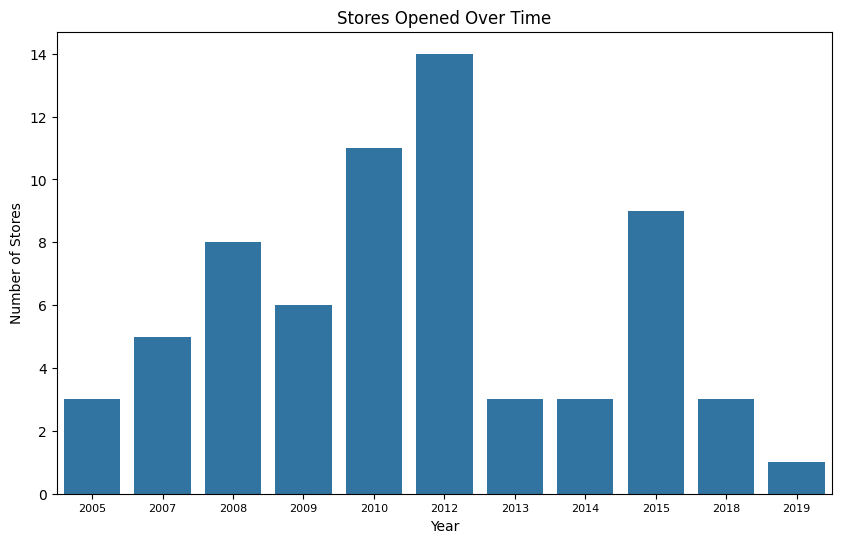

In [37]:
#Stores Opened based on year

stores['OpenDate'] = pd.to_datetime(stores['OpenDate'])

stores['OpenYear'] = stores['OpenDate'].dt.year

stores_per_year = stores['OpenYear'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=stores_per_year.index, y=stores_per_year.values)
plt.title('Stores Opened Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Stores')
plt.xticks(fontsize=8)
plt.show()


In [ ]:
# Connecting and fetching the data into mysql

import pandas as pd
import pymysql
from sqlalchemy import create_engine


sales_data = pd.read_csv('Sales_cleaned.csv')
stores_data = pd.read_csv('Stores_cleaned.csv')
product_data = pd.read_csv('Products_cleaned.csv')
exchange_rates_data = pd.read_csv('Exchange_Rates_cleaned.csv')
customers_data = pd.read_csv('Customers_cleaned.csv')


host = "localhost"
port = "3306"
username = "root"
password = "9600578719"
database = "datapark"

# Creating the database engine
engine_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(engine_string)

# Mapping datasets 
data_tables = {
    'customers': customers_data,
    'sales': sales_data,
    'stores': stores_data,
    'products': product_data,
    'exchange_rates': exchange_rates_data
}

# Inserting each dataset into its table
for table_name, df in data_tables.items():
    try:
        df.to_sql(table_name, engine, if_exists='append', index=False)
        print(f"Successfully inserted data into '{table_name}' table.")
    except Exception as e:
        print(f"Failed to insert data into '{table_name}' table: {e}")